# CNN Model

In [4]:
# import pre-built CNN architecture
from squeezenet_softmax import SqueezeNet

Using TensorFlow backend.


In [5]:
# Initialize SqueezeNet Architecture
## Input Shape 32x32 pixels 3 channels (R,G,B)
## Classes 41 Tagalog words
## Pooling layer set to max pooling
model_squeezenet = SqueezeNet(input_shape=(32,32,3), classes=41, pooling='max')

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [3]:
# Number of layers in SqueezeNet
len(model_squeezenet.layers)

67

In [4]:
# Composition of SqueezeNet Architecture
model_squeezenet.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 15, 15, 64)   1792        input_1[0][0]                    
__________________________________________________________________________________________________
relu_conv1 (Activation)         (None, 15, 15, 64)   0           conv1[0][0]                      
__________________________________________________________________________________________________
pool1 (MaxPooling2D)            (None, 7, 7, 64)     0           relu_conv1[0][0]                 
__________________________________________________________________________________________________
fire2/sque

In [5]:
# Import ADAM as CNN Optimizer
from keras.optimizers import Adam

In [6]:
# Compile CNN Architecture
model_squeezenet.compile(
    # Loss set to categorical_crossentropy for Multi-class Classification
    loss="categorical_crossentropy",
    # Set optimizer to ADAM with 0.0001 Learning Rate
    optimizer=Adam(lr=0.0001),
    # Set Accuracy as Metric
    metrics=["acc"],
)

W1110 15:48:42.573065 140277728024384 deprecation_wrapper.py:119] From /home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W1110 15:48:42.584928 140277728024384 deprecation_wrapper.py:119] From /home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [7]:
# Import Model Plotter
from keras.utils import plot_model

In [8]:
# Plot CNN Architecture and save to model.png
plot_model(model_squeezenet, to_file="model.png", show_shapes=True, rankdir="TB")

# Loading of FCS Dataset

In [8]:
# Import Image Loader and OS
from keras.preprocessing.image import ImageDataGenerator
import os

In [9]:
# Set number of train images per batch as 64
batch_size_train = 64
# Set number of test images per batch as 64
batch_size_val = 64
# Number of classes
num_classes= 41
# Standard size for images to load
STANDARD_SIZE=(32,32)
# Name of Classes
classes_required = os.listdir("Data_Images_V2/Train/")

In [11]:
# Load Train Images
train_path = 'Data_Images_V2/Train/'
train_batches = ImageDataGenerator().flow_from_directory(train_path, target_size=STANDARD_SIZE, classes=classes_required, batch_size=batch_size_train)

Found 9712 images belonging to 41 classes.


In [10]:
# Load Test Images
val_path = 'Data_Images_V2/Test/'
val_batches = ImageDataGenerator().flow_from_directory(val_path, target_size=STANDARD_SIZE, classes=classes_required, batch_size=batch_size_val)

Found 2355 images belonging to 41 classes.


# Model Training

In [13]:
# Import callbacks
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

In [14]:
# Model Checkpoint saves every best results for every epoch
callback_model = ModelCheckpoint("Trained-SqueezeNet-Model-FCS-Type-V2-11-10-2019-V2-1-Epoch {epoch:02d}--Train Acc {acc:.2f}--Val Acc {val_acc:.2f}.h5", monitor='val_acc', save_weights_only=True, save_best_only=True, verbose=True)

In [15]:
# Early Stopping stops epoch if model doesn't improved after the amount of patience indicated
callback_early = EarlyStopping(monitor='val_acc', min_delta=0.001, patience=10, restore_best_weights=True, verbose=True)

In [16]:
# Reduce Learning Rate on Plateau reduces learning rate when loss doesn't improved after the amount of patience indicated
callback_reduce = ReduceLROnPlateau(patience=5, factor=0.2, min_lr=0.000001, verbose=True)

In [21]:
# Train model with training images
history = model_squeezenet.fit_generator(train_batches, 
                             # Number of times the model will train
                             epochs=500, 
                             # Number of train batches to execute per epoch
                             steps_per_epoch=64, 
                             # Test Images for validation
                             validation_data=val_batches, 
                             # Number of validation batches to execute per epoch
                             validation_steps=64,
                             # Callbacks to be executed after each epochs
                             callbacks=[callback_early,callback_model,callback_reduce])

Epoch 1/500
2000/2000 [==============================] - 90s 45ms/step - loss: 0.3422 - acc: 0.8985 - val_loss: 0.8739 - val_acc: 0.7932

Epoch 00001: val_acc improved from -inf to 0.79323, saving model to Trained-SqueezeNet-Model-FCS-Type-V2-11-10-2019-V2-1-Epoch 01--Train Acc 0.90--Val Acc 0.79.h5
Epoch 2/500
2000/2000 [==============================] - 90s 45ms/step - loss: 0.2587 - acc: 0.9251 - val_loss: 0.8015 - val_acc: 0.8222

Epoch 00002: val_acc improved from 0.79323 to 0.82223, saving model to Trained-SqueezeNet-Model-FCS-Type-V2-11-10-2019-V2-1-Epoch 02--Train Acc 0.93--Val Acc 0.82.h5
Epoch 3/500
2000/2000 [==============================] - 89s 45ms/step - loss: 0.1483 - acc: 0.9548 - val_loss: 0.8660 - val_acc: 0.8229

Epoch 00003: val_acc improved from 0.82223 to 0.82287, saving model to Trained-SqueezeNet-Model-FCS-Type-V2-11-10-2019-V2-1-Epoch 03--Train Acc 0.95--Val Acc 0.82.h5
Epoch 4/500
2000/2000 [==============================] - 89s 45ms/step - loss: 0.1196 - acc

# Model history of training

In [31]:
# Values of accuracy per epoch
acc = [0.8985460748716665,
 0.9250970327079527,
 0.954842849987478,
 0.9633466883611362,
 0.9700294228195323,
 0.97638349818455,
 0.9771347189406303,
 0.9957587329484919]
#  0.9959225519734041,
#  0.9954535495254294,
#  0.996079566810969,
#  0.9960795668035063,
#  0.9968386127531745,
#  0.9968933892575436,
#  0.9968773478811438,
#  0.99692469012891,
#  0.996948165776838,
#  0.9968542632075146]

In [32]:
# Values of validation accuracy per epoch
val_acc = [0.7932253455225713,
 0.8222281577641479,
 0.8228723156176673,
 0.8174362521690068,
 0.8186303007868458,
 0.8198243493812735,
 0.8400760422668936,
 0.847083222239755]
#  0.8420242268304334,
#  0.841804270487809,
#  0.8402488650911389,
#  0.8437995885697278,
#  0.8459677294487347,
#  0.8446322803459931,
#  0.8432182754286068,
#  0.8433753871065922,
#  0.8410658457202078,
#  0.8431082972755556]

In [33]:
# Values of loss per epoch
loss = [0.34217259881305984,
 0.25871856989092024,
 0.1483336622914686,
 0.1195702070585569,
 0.0994411338868369,
 0.07916085280445817,
 0.07484452292559587,
 0.018190510559542895]
#  0.01694078361126539,
#  0.01800097734539642,
#  0.015705072648832124,
#  0.015698960747364075,
#  0.012841447286421682,
#  0.01271516624713784,
#  0.012697017510237872,
#  0.012574297532459321,
#  0.012542116220453179,
#  0.012537939019759328]

In [34]:
# Values of validation loss per epoch
val_loss = [0.8739344605168712,
 0.8015428664939049,
 0.8659974136634075,
 0.94593105107669,
 0.9013582230734262,
 1.0700830496335738,
 1.0093108686830103,
 1.0604551655525787]
#  1.1331966772901902,
#  1.1484390101364308,
#  1.2180939160857331,
#  1.2243626790139663,
#  1.2176366340520048,
#  1.2404502302983673,
#  1.2805392486611515,
#  1.297770364851747,
#  1.3259593865076713,
#  1.3072961779708796]

# Model perfomance plot

In [21]:
# Import 
import matplotlib.pyplot as plt
%matplotlib inline

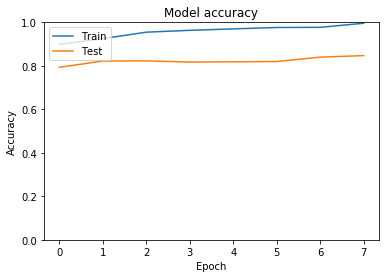

In [35]:
# Plot training & validation accuracy values
plt.plot(acc)
plt.plot(val_acc)
plt.ylim([0.0, 1.0])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

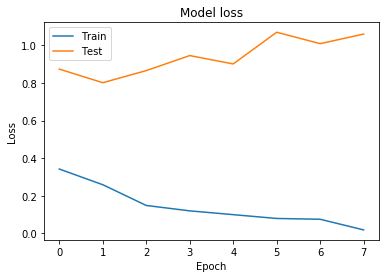

In [30]:
# Plot training & validation loss values
plt.plot(loss)
plt.plot(val_loss)
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()